回帰係数 = [[1.4912]]
切片 = [-0.0234]
決定係数 = 0.998235667781501


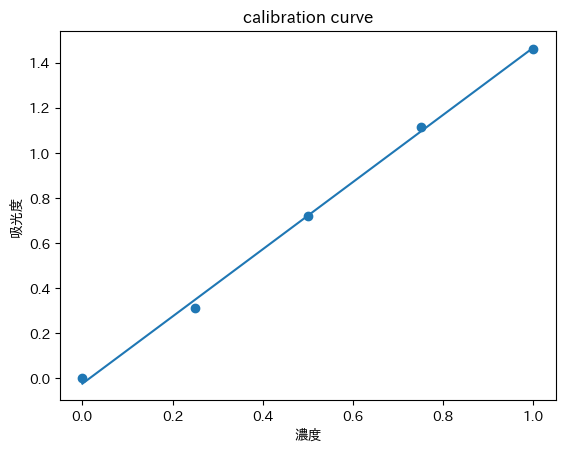

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn import linear_model

X = np.arange(0, 1.25, 0.25).reshape(-1, 1)
Y = np.array([0.201, 0.512, 0.924, 1.316, 1.663]).reshape(-1, 1) - 0.201

model = linear_model.LinearRegression()
model.fit(X, Y)
print("回帰係数 =", model.coef_)
print("切片 =", model.intercept_)
Y_pred = model.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.title("calibration curve")
plt.xlabel("濃度")
plt.ylabel("吸光度")
print("決定係数 =", model.score(X, Y))

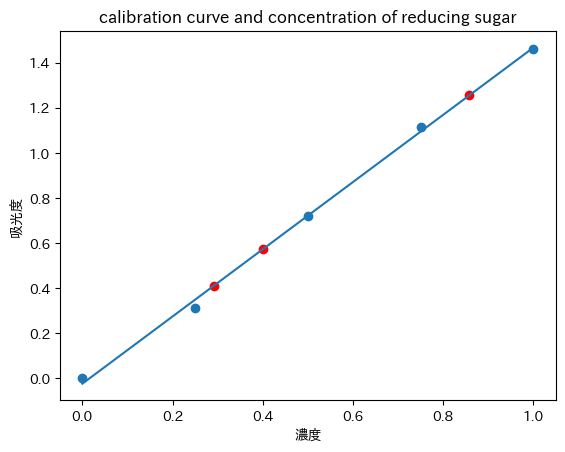

consentration = [[0.4120304 0.5745712 1.2560496]]


In [53]:
import numpy as numpy
import matplotlib.pyplot as plt 
from sklearn import linear_model

time = np.array([0, 2, 24]).reshape(-1, 1)
absorbance = np.array([0.527, 0.636, 1.093]).reshape(-1, 1) - 0.235
absorbance_pred = model.predict(absorbance)

#calibration
plt.scatter(X, Y)
plt.plot(X, Y_pred)
plt.title("calibration curve and concentration of reducing sugar")
plt.xlabel("濃度")
plt.ylabel("吸光度")

#polymer
plt.scatter(absorbance, absorbance_pred, c="red")
plt.show()
print("consentration =", absorbance_pred.reshape(1, -1))

In [63]:
import numpy as np

sugar_conc = np.array([0.4120304, 0.5745712, 1.2560496])
W_d = np.array([0.2517, 0.2548, 0.2493])
M_b = (sugar_conc * 30 * 1e-3) / 180
M_s = W_d / 241

decomp_rate = (M_b / M_s) * 100
decomp_rate

array([ 6.57524344,  9.05753919, 20.23719438])

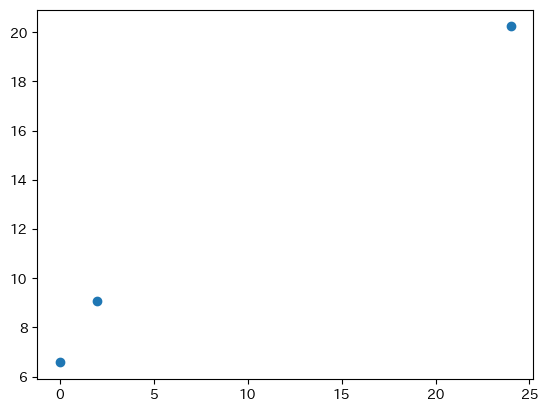

In [64]:
import matplotlib.pyplot as plt 

plt.scatter(time, decomp_rate)